# Combined slice timing and motion correction

In [1]:
import numpy as np

In [2]:
# - make numpy print numbers to 4dp only
np.set_printoptions(precision=4, suppress=True)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
# - set gray colormap and nearest neighbor interpolation by default
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'

In [4]:
import nipy

In [5]:
img = nipy.load_image('ds114_sub009_t2r1.nii')

In [6]:
print(img.metadata['header'])

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : 
db_name         : ?TR:2500.000 TE:50
extents         : 0
session_error   : 0
regular         : r
dim_info        : 0
dim             : [  4  64  64  30 173   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.   4.   4.   4.   2.5  1.   1.   1. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 255
glmin           : 0
descrip         : 
aux_file        : 
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.9958999753
quatern_d       : -0.0904608666897
qoffset_x       : 124.244003296
qoffset_y       : -103.449684143
qoffset_z    

In [7]:
img.affine

array([[  -4.    ,    0.    ,    0.    ,    0.    ,  124.244 ],
       [   0.    ,    3.9345,    0.7207,    0.    , -103.4497],
       [   0.    ,   -0.7207,    3.9346,    0.    ,  -33.4929],
       [   0.    ,    0.    ,    0.    ,    2.5   ,    0.    ],
       [   0.    ,    0.    ,    0.    ,    0.    ,    1.    ]])

In [8]:
TR = img.affine[3, 3]
TR

2.5

Drop the first four scans because of the T1 effect:

In [9]:
img = img[..., 4:]

In [10]:
import nipy.algorithms.registration as reg

In [11]:
realigner = reg.SpaceTimeRealign(img, TR, 
                                slice_times='asc_alt_2_1',
                                slice_info=2)

In [12]:
realigner.estimate()

In [13]:
transforms = realigner._transforms
len(transforms)

1

In [14]:
run_0_xforms = transforms[0]
len(run_0_xforms)

169

In [15]:
run_0_xforms[0]

In [16]:
affines = [t.as_affine() for t in run_0_xforms]
print(affines[0])
print(affines[1])

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
[[ 1.     -0.0002 -0.0003  0.0091]
 [ 0.0002  1.      0.0011  0.0538]
 [ 0.0003 -0.0011  1.     -0.0132]
 [ 0.      0.      0.      1.    ]]


In [17]:
translations = np.array([aff[:3, 3] for aff in affines])
translations.shape

(169, 3)

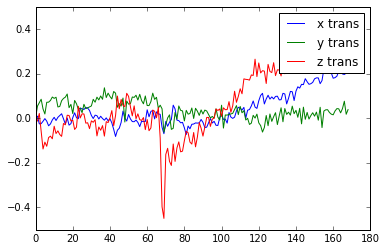

In [18]:
plt.plot(translations[:, 0], label='x trans')
plt.plot(translations[:, 1], label='y trans')
plt.plot(translations[:, 2], label='z trans')
plt.legend()

In [19]:
rotations = np.array([reg.aff2euler(aff) for aff in affines])

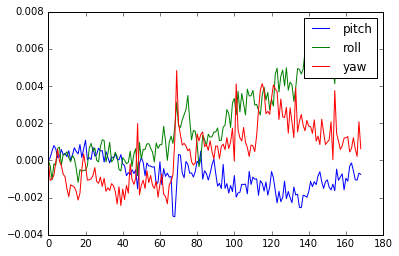

In [20]:
plt.plot(rotations[:, 0], label='pitch')
plt.plot(rotations[:, 1], label='roll')
plt.plot(rotations[:, 2], label='yaw')
plt.legend()

In [21]:
resampled = realigner.resample()
resampled

[Image(
   data=array([[[[  0.      ,   0.000074, ...,   0.001223,   0.000451],
                 [  0.      ,   0.000085, ...,   0.000713,   0.00139 ],
                 ..., 
                 [  0.      ,   0.051973, ...,   0.      ,   0.      ],
                 [  0.      ,   0.058917, ...,   0.      ,   0.      ]],
        
                [[  8.      ,   8.71661 , ...,   6.583106,   6.394012],
                 [ 11.      ,   9.945649, ...,   8.784708,  10.17362 ],
                 ..., 
                 [ 19.      ,  19.464961, ...,  20.643561,  16.838666],
                 [ 28.      ,  24.86332 , ...,  15.206437,  23.127412]],
        
                ..., 
                [[  0.      ,  -0.048842, ...,  -0.406868,  -0.301597],
                 [  0.      ,  -0.043405, ...,  -0.406209,  -0.192432],
                 ..., 
                 [  0.      ,  -0.024625, ...,  -0.005714,  -0.000288],
                 [  0.      ,  -0.013569, ...,   0.038342,  -0.006008]],
        
       